<a href="https://colab.research.google.com/github/Manojkumar310897/Customer_churn_prediction/blob/main/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
#Importing the Libraires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import warnings 
warnings.filterwarnings("ignore")

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
#loading the dataset
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [59]:
df.shape

(7043, 21)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [61]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'],errors='coerce')

In [62]:
df=df.drop(['customerID'],axis=1)

# DATA CLEANING

### 1.Checking for null values

In [63]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [64]:
df.dropna(how = 'any', inplace = True)

**2.Checking for Data Types**

In [65]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### **3.Spelling correction**

In [66]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [67]:
df['gender'].value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [68]:
df['SeniorCitizen'].value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [69]:
df['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

In [70]:
df['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [71]:
df['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [72]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [73]:
df['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [74]:
df['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [75]:
df['OnlineBackup'].value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [76]:
df['DeviceProtection'].value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [77]:
df['StreamingMovies'].value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [78]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [79]:
df['PaperlessBilling'].value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [80]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [81]:
df['Churn'].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

**4.Checking for duplicates**

In [82]:
df.duplicated().sum()

22

# **Explanatory Data Analysis**

# 1.Checking for Outliers

<Axes: >

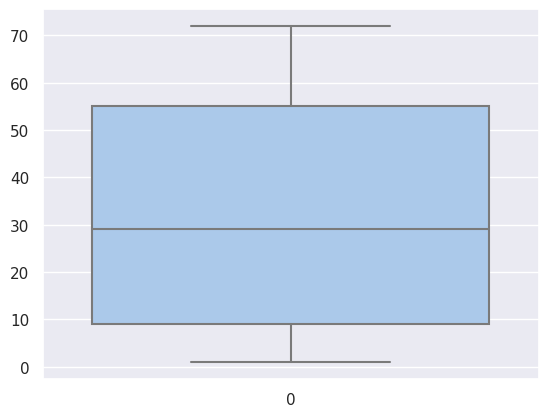

In [83]:
sns.boxplot(df['tenure'])

<Axes: >

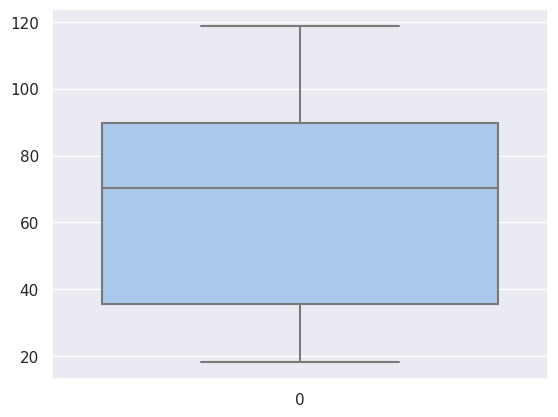

In [84]:
sns.boxplot(df['MonthlyCharges'])

<Axes: >

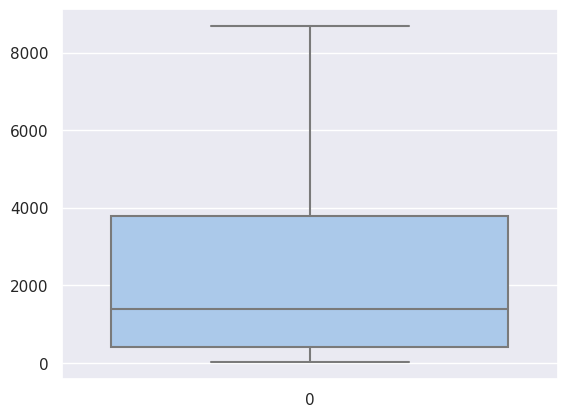

In [85]:
sns.boxplot(df['TotalCharges'])

<Axes: >

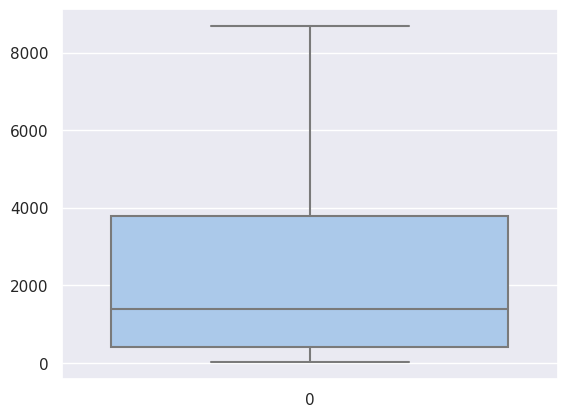

In [86]:
sns.boxplot(df['TotalCharges'])

<Axes: xlabel='MonthlyCharges', ylabel='Density'>

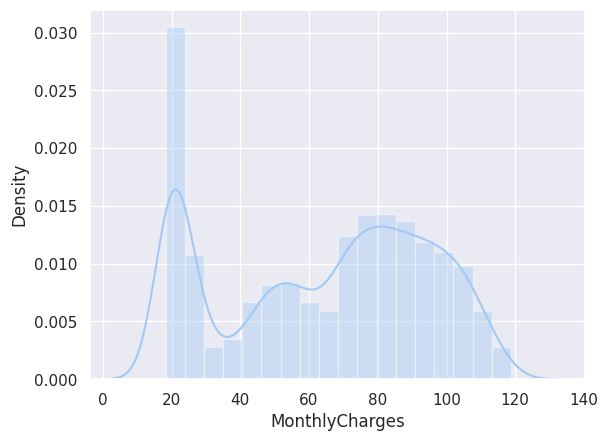

In [87]:
sns.distplot(df['MonthlyCharges'])

<Axes: xlabel='tenure', ylabel='Density'>

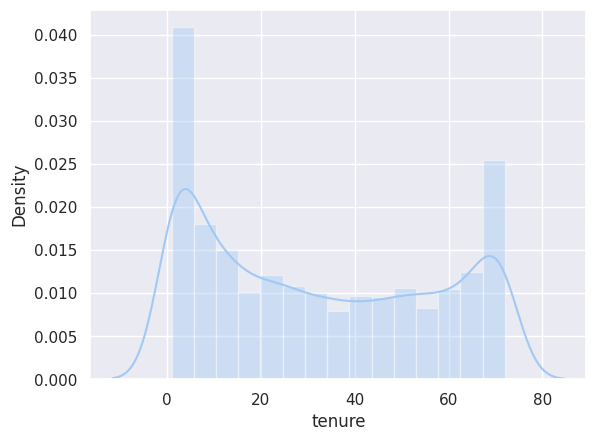

In [88]:
sns.distplot(df['tenure'])

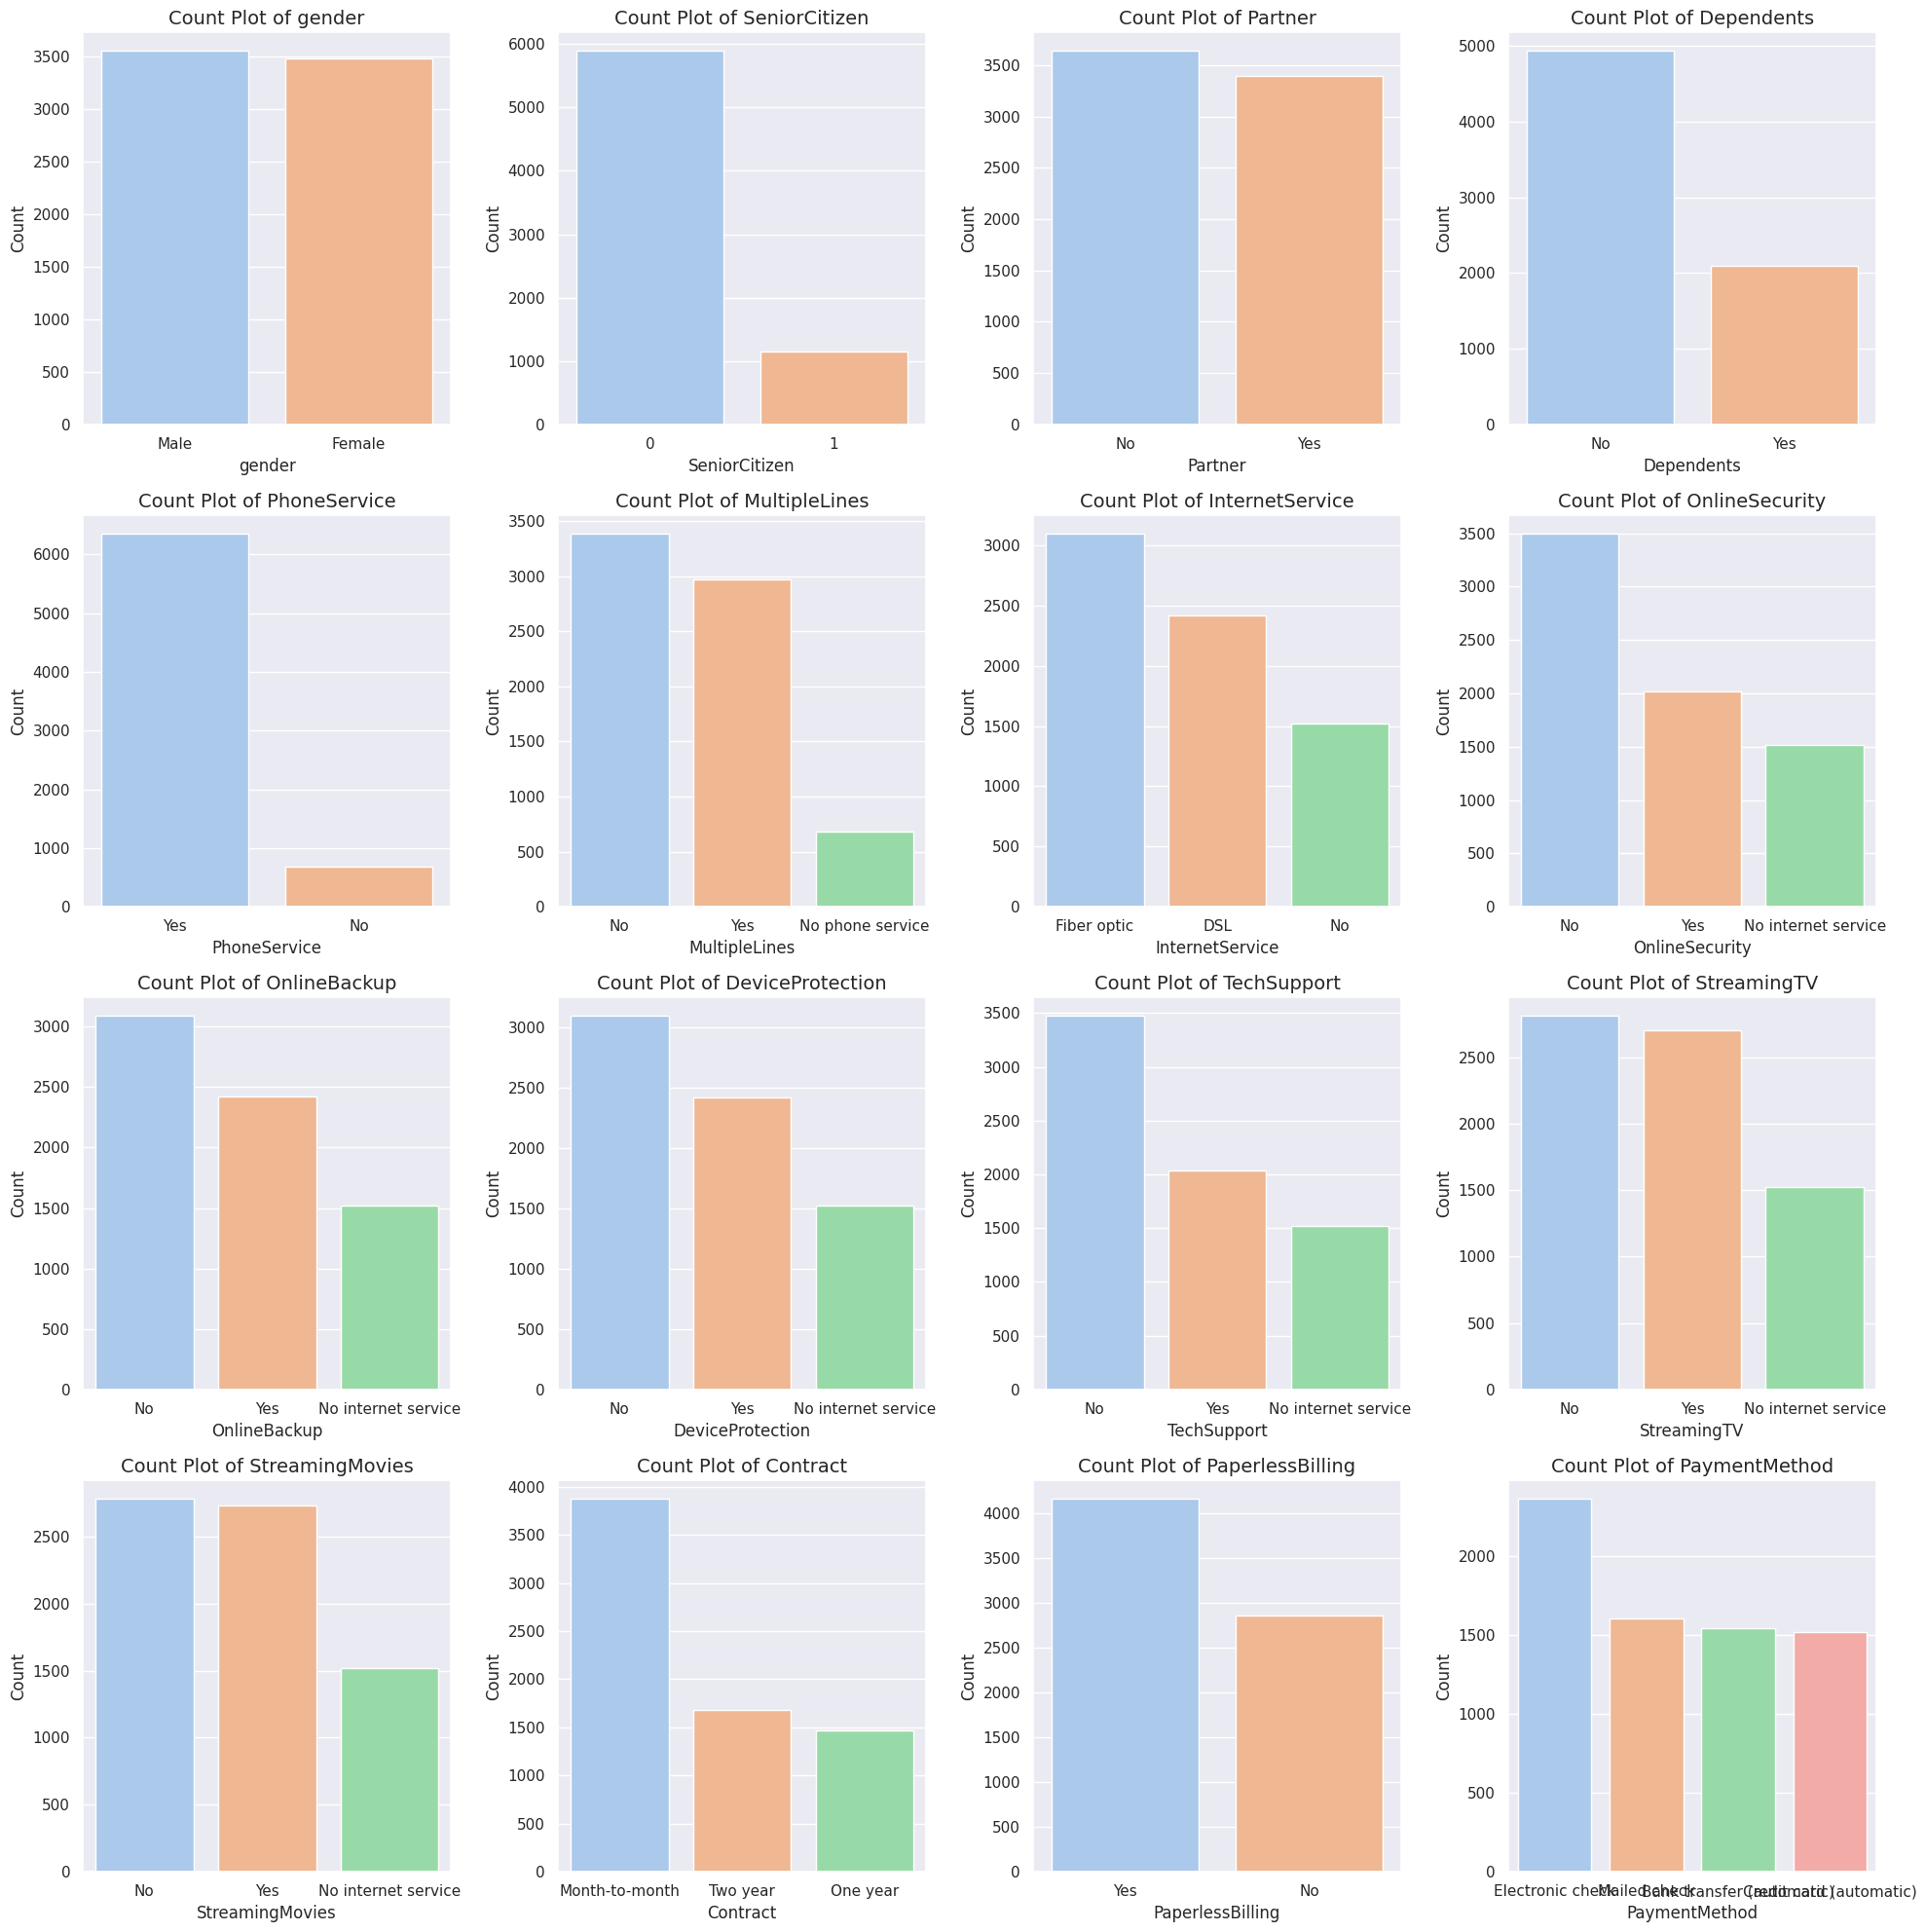

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define categorical columns
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling', 'PaymentMethod']

# Set plotting style
sns.set_theme(style='darkgrid', palette='pastel')

# Create subplots
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

# Flatten axs into a 1-D array for easy iteration
axs = axs.flatten()

# Loop through each categorical column and create a countplot
for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axs[i])
    axs[i].set_xlabel(col, fontsize=12)
    axs[i].set_ylabel('Count', fontsize=12)
    axs[i].set_title(f"Count Plot of {col}", fontsize=14)

# Remove extra subplots
for i in range(len(cat_cols), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

# **INTERPRETATIONS**


According to the count plot here are some interpretations.


1.The gender doesnt play a role,the count of both genders are almost equal.

2.The Customers who are Seniorcitizens count is very low.

3.The Customers who have partners are very low.

4.The Customers who have dependents are very low.

5.The Customers who have Phone service are very high.

6.The Customers who have Multiple lines are quite low when compared to customers who have Multiple lines.

7.According to count plot the customers mostly use the Fiberoptic as their mode of Internet Service.

8.According to count plot the most of the customers dont have Internet Security.

9.According to count plot the most of the customers dont have Internet Backup.

10.According to count plot the most of the customers dont have Device Protection.

11.According to count plot the about half of the customers dont have Tech Support.

12.The Customers who have StreamingTv are quite low when compared to customers who have StreamingTv.

13..According to count plot the almost equal amount of customers dont Stream Movies when compared to people who stream Movies.

14.According to count plot the Most of the customers have contract of Month to month.

15.According to count plot the Most of the customers have PaperlessBilling.

16.According to count plot the most of the customers Electronic check as their payment method.



# **FEATURE VS TARGET PLOTS**

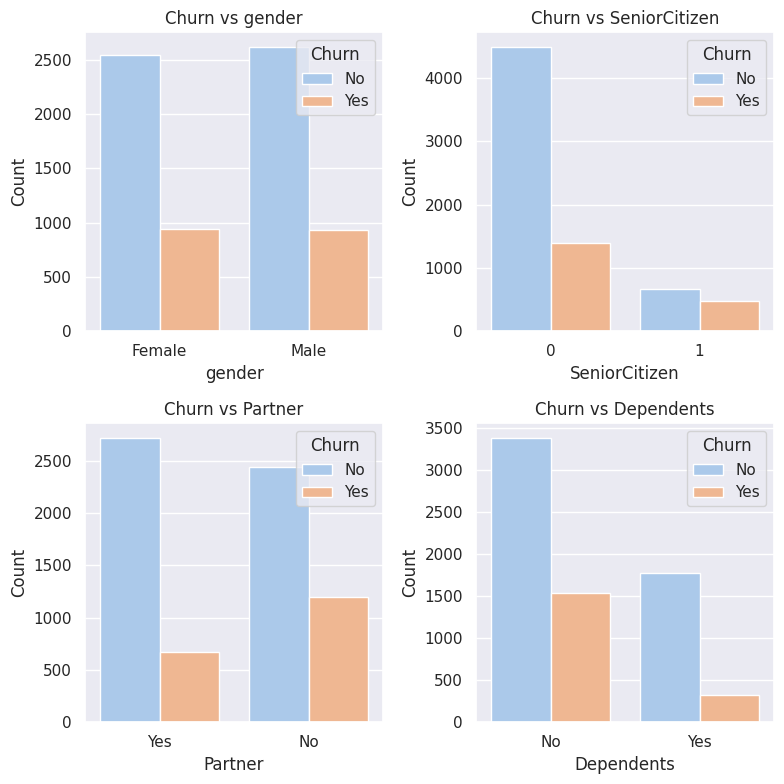

In [90]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=df, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        
plt.tight_layout()
plt.show()


1.Gender doesnt play a role in predicting the customer will churn or not.

2.The customers who are not dependents,Who doesnt have partner and who are not senior citizens tend to churn more.

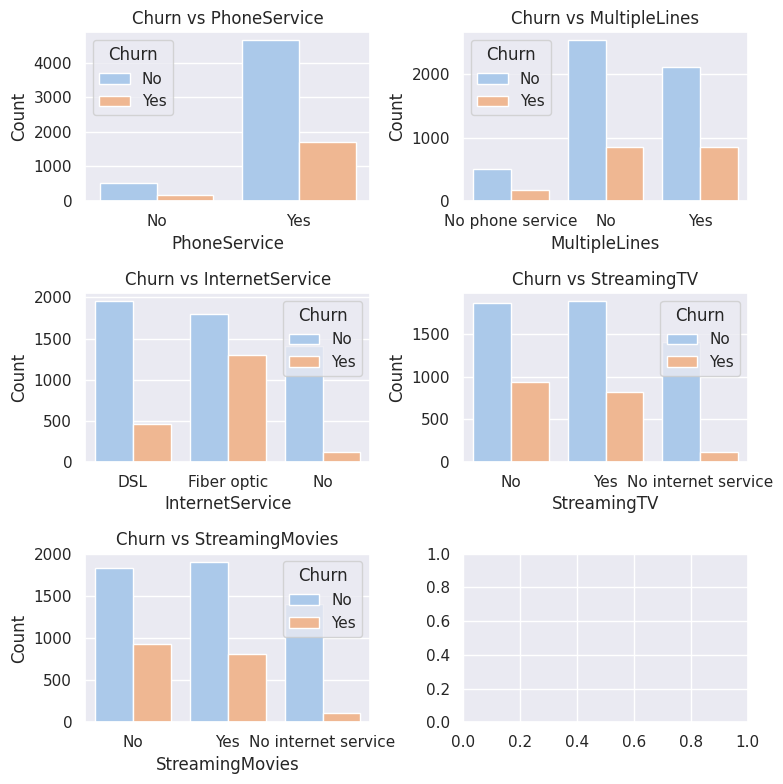

In [91]:
services = df[['Churn', 'PhoneService', 'MultipleLines', 'InternetService','StreamingTV', 'StreamingMovies']]
cols = services.columns[1:]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=services, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

1.The customers who have Phone service tend to churn more.

2.The customers with multiple lines doesnt play a role in predicting the churn.

3.The customers who have Fiber optic as their mode of Internet tend to churn more.

4.The customers who are not used to StreamingTv aand StreamingMovies churn more.

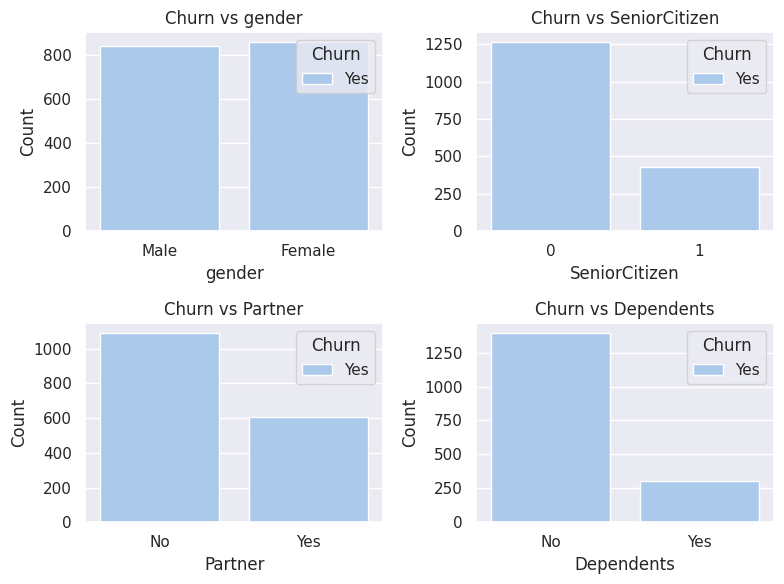

In [92]:
phone_churn = df[(df['PhoneService']=='Yes') & (df['Churn']=='Yes')]

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=phone_churn, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

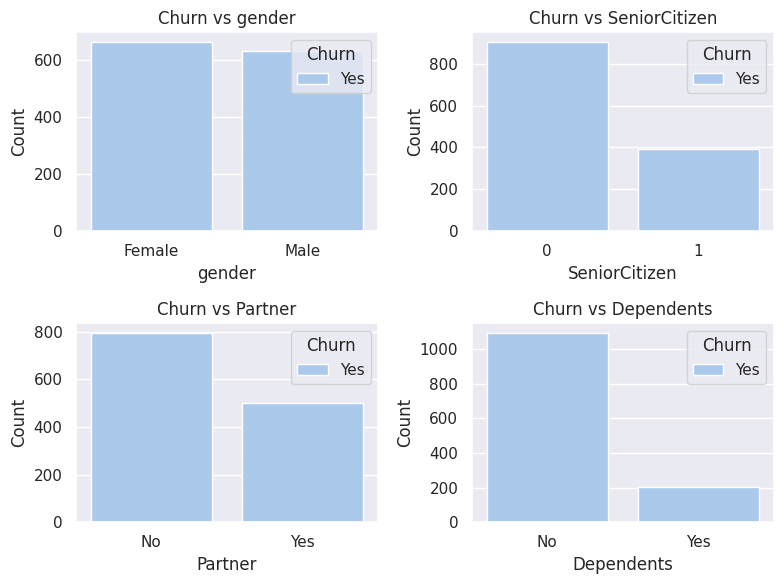

In [93]:
fiber_churn = df[(df['InternetService']=='Fiber optic') & (df['Churn'] == 'Yes')]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for k, ax in enumerate(axes.flat):
    if k < len(cols):
        sns.countplot(data=fiber_churn, x=cols[k], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[k]}')
        ax.set_xlabel(cols[k])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

With regards to the churn rate based on security_support variables, customers without online security, online backup, device protecion and tech support tend to churn more often than their counterparts.

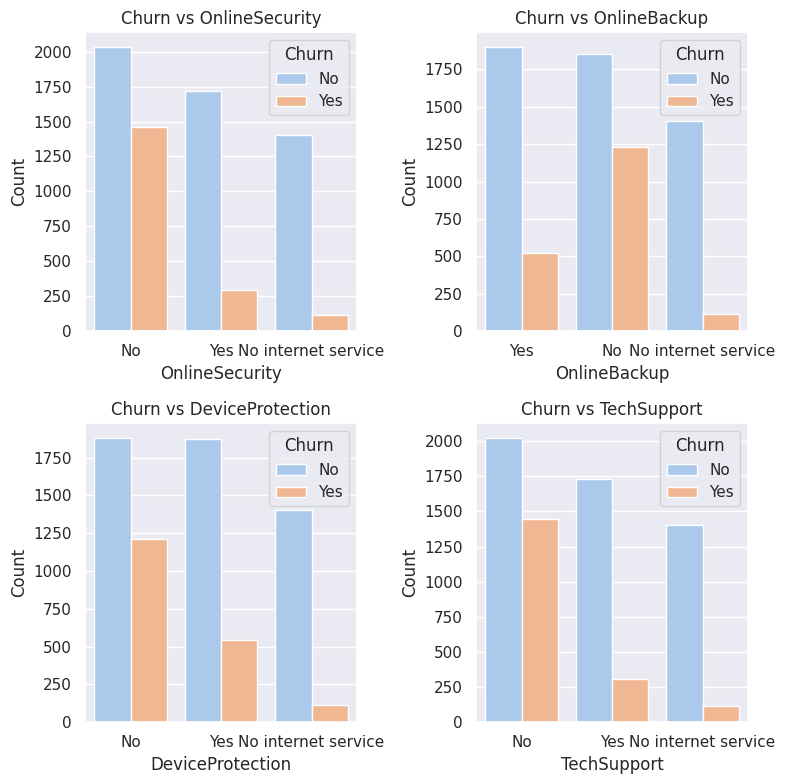

In [94]:
security_support = df[['Churn', 'OnlineSecurity', 'OnlineBackup','DeviceProtection', 'TechSupport']]
cols = security_support.columns[1:]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=security_support, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

1.The customers who dont have Device Protection and who dont have tech support tend to churn more.

2.The customers who dont have Online Backup and who dont have Online Security  tend to churn more.


<Axes: xlabel='Contract', ylabel='count'>

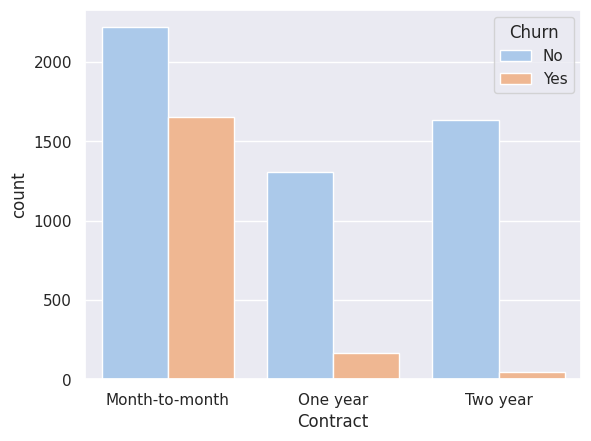

In [95]:
sns.countplot(data=df, x=df['Contract'], hue='Churn')

1.The customers who have Month to month contract tend to churn more thab people who have 1 year and 2 year contract.

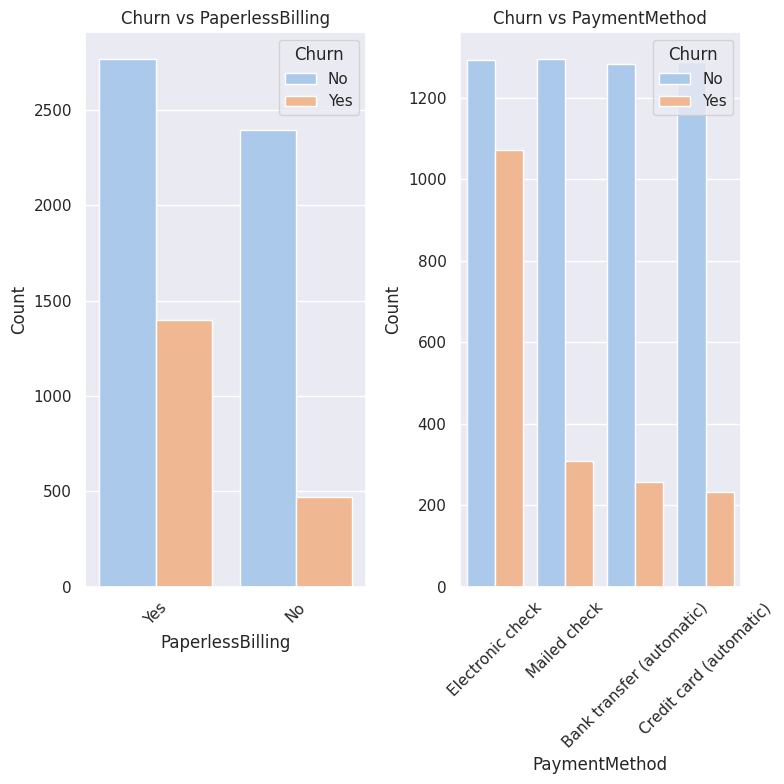

In [96]:
paying_options = df[['Churn', 'PaperlessBilling', 'PaymentMethod']]
cols = paying_options.columns[1:]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,8))

for i, ax in enumerate(axes.flat):
    if i < len(cols):
        sns.countplot(data=paying_options, x=cols[i], hue='Churn', ax=ax)
        ax.set_title(f'Churn vs {cols[i]}')
        ax.set_xlabel(cols[i])
        ax.set_ylabel('Count')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

1.The customers who prefer paperless billing tend to churn more.

2.The customers who use Electronic check as payment method tend to churn more.

In [97]:
bins = [-1, 12, 24, 36, 48, 60, 72]
labels = ['0-12', '13-24', '25-36', '37-48', '49-60', '61-72']
df['tenure_grouped'] = pd.cut(df['tenure'], bins=bins, labels=labels)

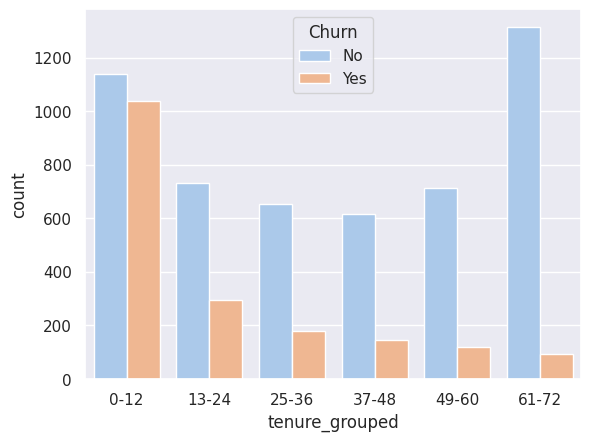

In [98]:
sns.countplot(data = df, x = 'tenure_grouped', hue = 'Churn')
plt.show()

The customers who spent less than 12 months tend to churn more than customers who spend more than 12 months.



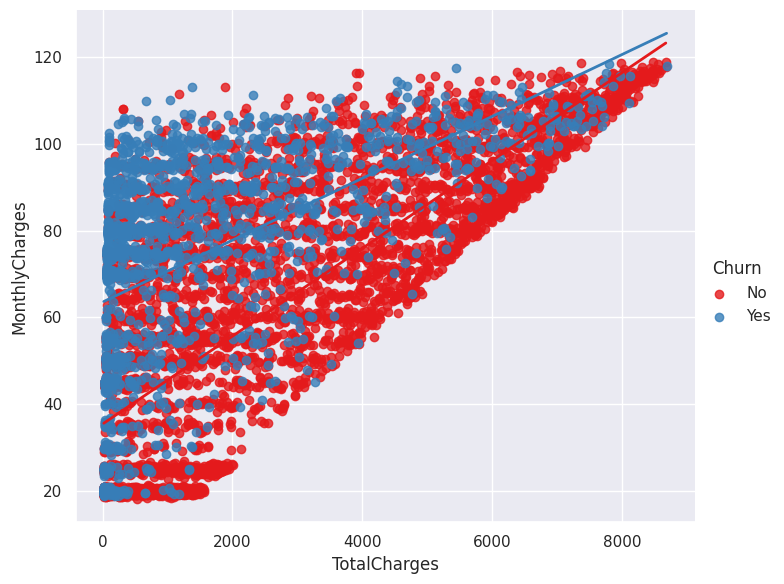

In [99]:
import seaborn as sns

sns.lmplot(data=df, x='TotalCharges', y='MonthlyCharges', hue='Churn', ci=None, height=6, aspect=1.2, palette='Set1', line_kws={'linewidth': 2})
sns.despine()
plt.show()

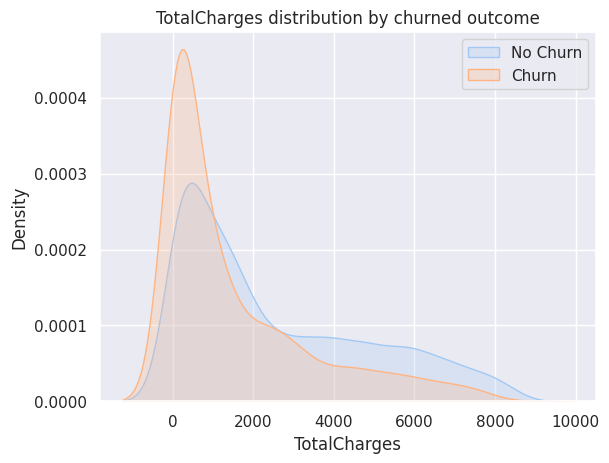

In [100]:
sns.kdeplot(df['TotalCharges'][df['Churn']=='No'], label='Churn - No', shade = True)
sns.kdeplot(df['TotalCharges'][df['Churn']=='Yes'], label='Churn - Yes', shade = True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.xlabel('TotalCharges')
plt.title('TotalCharges distribution by churned outcome')
plt.show()

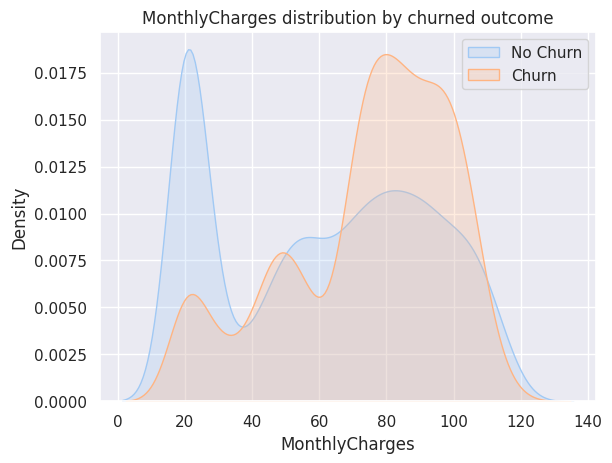

In [101]:
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='No'], label='Churn - No', shade = True)
sns.kdeplot(df['MonthlyCharges'][df['Churn']=='Yes'], label='Churn - Yes', shade = True)
plt.legend(["No Churn","Churn"],loc='upper right')
plt.xlabel('MonthlyCharges')
plt.title('MonthlyCharges distribution by churned outcome')
plt.show()

In [102]:
churn_monthly = pd.Series([df[df['Churn'] == 'Yes']['MonthlyCharges'].mean(),
                           df[df['Churn'] == 'No']['MonthlyCharges'].mean()],
                          index=['Churned', 'Non-Churned'])
churn_total = pd.Series([df[df['Churn'] == 'Yes']['TotalCharges'].mean(),
                       df[df['Churn'] == 'No']['TotalCharges'].mean()],
                       index = ['Churned', 'Non-Churned'])

In [103]:
churn_monthly

Churned        74.441332
Non-Churned    61.307408
dtype: float64

In [104]:
churn_total

Churned        1531.796094
Non-Churned    2555.344141
dtype: float64

# **KEY TAKEAWAYS**

1.**High Churn rate** is seen for the customers without dependants, online security, tech support. Also customers who use electronic checks as a payment method, who use our services less than 1 year and who have month-to-month contracts are likely to churn frequently. Factors that also contribute to the high churn rate (although their impact is less significant then the aforementioned variables) are: Non-seniority, no partners, no phone service, no online backup, no device protection and paperless billing.

2.**Low Churn rate** is seen for the customers that use our services more than 4 years, that have one-year / two-years contracts and for the customers without internet service, streamingTV and streamingMovies.

3.Almost **no impact on churn** have the variables such as gender, streamingTV, streamingMovies and MultipleLines

# **Encoding**

**Label Encoding**

In [110]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_grouped
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-12


In [111]:
dx=df.iloc[:,0:-1]
dx.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [112]:
y=df["Churn"]

In [113]:
from sklearn.preprocessing import LabelEncoder
y=LabelEncoder().fit_transform(y)
# X=LabelEncoder().fit_transform(X)

In [116]:
dx['gender']=LabelEncoder().fit_transform(dx['gender'])
dx['Partner']=LabelEncoder().fit_transform(dx['Partner'])
dx['Dependents']=LabelEncoder().fit_transform(dx['Dependents'])
dx['PhoneService']=LabelEncoder().fit_transform(dx['PhoneService'])
dx['MultipleLines']=LabelEncoder().fit_transform(dx['MultipleLines'])
dx['InternetService']=LabelEncoder().fit_transform(dx['InternetService'])
dx['OnlineSecurity']=LabelEncoder().fit_transform(dx['OnlineSecurity'])
dx['OnlineBackup']=LabelEncoder().fit_transform(dx['OnlineBackup'])
dx['DeviceProtection']=LabelEncoder().fit_transform(dx['DeviceProtection'])
dx['StreamingTV']=LabelEncoder().fit_transform(dx['StreamingTV'])
dx['StreamingMovies']=LabelEncoder().fit_transform(dx['StreamingMovies'])
dx['Contract']=LabelEncoder().fit_transform(dx['Contract'])
dx['PaperlessBilling']=LabelEncoder().fit_transform(dx['PaperlessBilling'])
dx['PaymentMethod']=LabelEncoder().fit_transform(dx['PaymentMethod'])
dx['TechSupport']=LabelEncoder().fit_transform(dx['TechSupport'])
dx['TechSupport']=LabelEncoder().fit_transform(dx['TechSupport'])

In [117]:
for i in ['Churn']:
    dx[i] = dx[i].map({'Yes': 1, 'No': 0})

In [118]:
dx.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [119]:
dx.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001819,-0.001379,0.010349,0.005285,-0.007515,-0.006908,-0.002236,-0.014899,-0.011920,0.001348,-0.006695,-0.005624,-0.008920,0.000095,-0.011902,0.016942,-0.013779,0.000048,-0.008545
SeniorCitizen,-0.001819,1.000000,0.016957,-0.210550,0.015683,0.008392,0.146287,-0.032160,-0.127937,-0.013355,-0.021124,-0.151007,0.031019,0.047088,-0.141820,0.156258,-0.038158,0.219874,0.102411,0.150541
Partner,-0.001379,0.016957,1.000000,0.452269,0.381912,0.018397,0.142717,0.000513,0.150610,0.153045,0.165614,0.126488,0.136679,0.129907,0.294094,-0.013957,-0.156232,0.097825,0.319072,-0.149982
Dependents,0.010349,-0.210550,0.452269,1.000000,0.163386,-0.001078,-0.024975,0.044030,0.151198,0.090231,0.079723,0.132530,0.046214,0.022088,0.240556,-0.110131,-0.041989,-0.112343,0.064653,-0.163128
tenure,0.005285,0.015683,0.381912,0.163386,1.000000,0.007877,0.343673,-0.029835,0.327283,0.372434,0.372669,0.324729,0.290572,0.296785,0.676734,0.004823,-0.370087,0.246862,0.825880,-0.354049
PhoneService,-0.007515,0.008392,0.018397,-0.001078,0.007877,1.000000,-0.020504,0.387266,-0.014163,0.024040,0.004718,-0.018136,0.056393,0.043025,0.003019,0.016696,-0.005499,0.248033,0.113008,0.011691
MultipleLines,-0.006908,0.146287,0.142717,-0.024975,0.343673,-0.020504,1.000000,-0.108849,0.007306,0.117276,0.122614,0.010941,0.175403,0.181705,0.111029,0.165306,-0.176598,0.433905,0.453202,0.038043
InternetService,-0.002236,-0.032160,0.000513,0.044030,-0.029835,0.387266,-0.108849,1.000000,-0.028003,0.036735,0.045558,-0.025626,0.108190,0.097967,0.099579,-0.138166,0.084504,-0.322173,-0.175691,-0.047097
OnlineSecurity,-0.014899,-0.127937,0.150610,0.151198,0.327283,-0.014163,0.007306,-0.028003,1.000000,0.184942,0.175789,0.284875,0.044399,0.056313,0.373980,-0.157723,-0.096593,-0.053576,0.254473,-0.289050
OnlineBackup,-0.011920,-0.013355,0.153045,0.090231,0.372434,0.024040,0.117276,0.036735,0.184942,1.000000,0.187646,0.195581,0.147085,0.137083,0.280617,-0.012697,-0.125534,0.119943,0.375556,-0.195290


<Axes: >

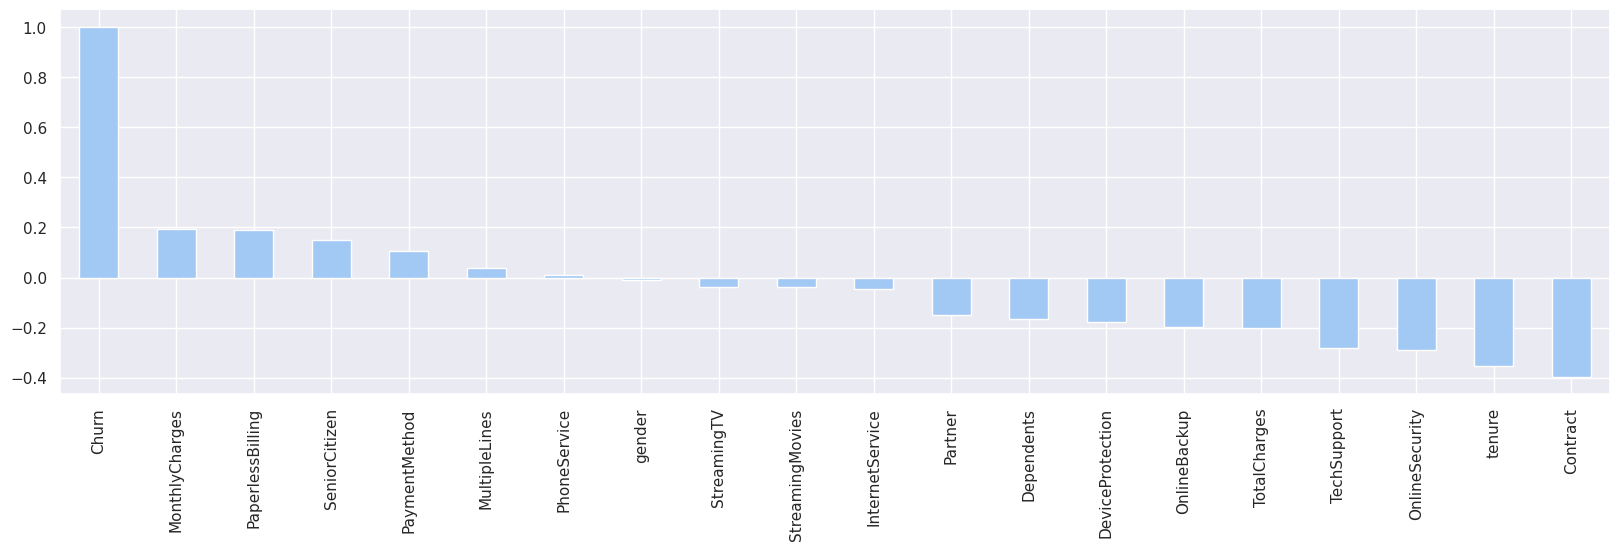

In [120]:
#Correlation between all columns and Churn
plt.figure(figsize=(20,5))
dx.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [121]:
churn_counts = dx['Churn'].value_counts()
churn_ratio = churn_counts[0] / churn_counts[1]

In [122]:
print("The ratio between retained customers and churners is",churn_ratio)

The ratio between retained customers and churners is 2.7624398073836276


In [123]:
dx.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**Splitting the dataset into train and test**

In [124]:
X = dx.drop(columns=['Churn','PhoneService','gender','StreamingTV','StreamingMovies'],axis=1)
y = dx['Churn']

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [127]:
from imblearn.combine import SMOTEENN 
smt = SMOTEENN(sampling_strategy='all') 
X_smt, y_smt = smt.fit_resample(X_train_scaled, y_train) 

In [128]:
import collections, numpy
counter = collections.Counter(y_smt)
counter

Counter({0: 2353, 1: 2604})

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr3 = LogisticRegression()
lr3.fit(X_smt,y_smt)
lr3.score(X_smt,y_smt)

0.9021585636473674

# **1.LOGISTIC REGRESSION**

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

lr = LogisticRegression()
lr.fit(X_smt,y_smt)
lr.score(X_smt,y_smt)

0.9021585636473674

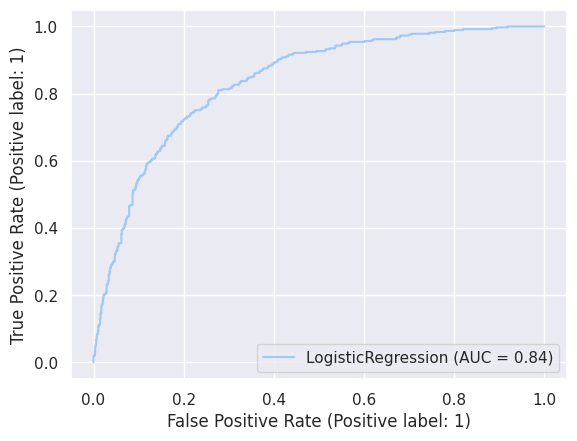

In [131]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(lr, X_test_scaled, y_test)

# **2.Decision Tree Classifier**

In [132]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_smt, y_smt)
yr_predict = classifier_dt.predict(X_test_scaled)

In [133]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier_dt.predict(X_test_scaled)
cm = confusion_matrix(y_test, yr_predict)
print(cm)
acc_decisiontree = accuracy_score(y_test, yr_predict)
print(acc_decisiontree)
print(metrics.classification_report(y_test, y_pred))

[[757 281]
 [ 96 273]]
0.7320540156361052
              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1038
           1       0.49      0.74      0.59       369

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.70      1407
weighted avg       0.78      0.73      0.75      1407



In [134]:
dtc=DecisionTreeClassifier()
dtc.fit(X_smt,y_smt) 
print(dtc.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dtc.predict_proba(X_test_scaled)[:, 1]))

1.0
AUROC on the sampled dataset :  0.7271840781991634


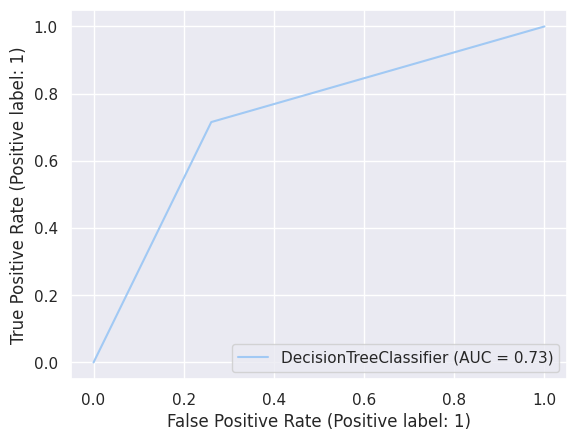

In [135]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(dtc, X_test_scaled, y_test)

In [136]:
from sklearn.metrics import RocCurveDisplay,accuracy_score
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_smt, y_smt) # the model is trained
  trainAccuracy = accuracy_score(y_smt, dt.predict(X_smt)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X_test_scaled, y_test, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))

Depth  :  1  Training Accuracy :  0.8718983256001613  Cross val score :  0.73774062816616
Depth  :  2  Training Accuracy :  0.8718983256001613  Cross val score :  0.7540881458966565
Depth  :  3  Training Accuracy :  0.8924752874722615  Cross val score :  0.7888956433637284
Depth  :  4  Training Accuracy :  0.9072019366552351  Cross val score :  0.7839057750759878
Depth  :  5  Training Accuracy :  0.918902562033488  Cross val score :  0.7874873353596757
Depth  :  6  Training Accuracy :  0.9390760540649586  Cross val score :  0.7846301925025329
Depth  :  7  Training Accuracy :  0.9505749445228969  Cross val score :  0.77112968591692
Depth  :  8  Training Accuracy :  0.9675206778293323  Cross val score :  0.7604255319148937
Depth  :  9  Training Accuracy :  0.9794230381279  Cross val score :  0.7306231003039514
Depth  :  10  Training Accuracy :  0.9870889650998588  Cross val score :  0.7206686930091186
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.7050253292806485
Depth  : 

In [137]:
dtc=DecisionTreeClassifier(max_depth=4)
dtc.fit(X_smt,y_smt) 
print(dtc.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, dtc.predict_proba(X_test_scaled)[:, 1]))

0.9072019366552351
AUROC on the sampled dataset :  0.8216029366459368


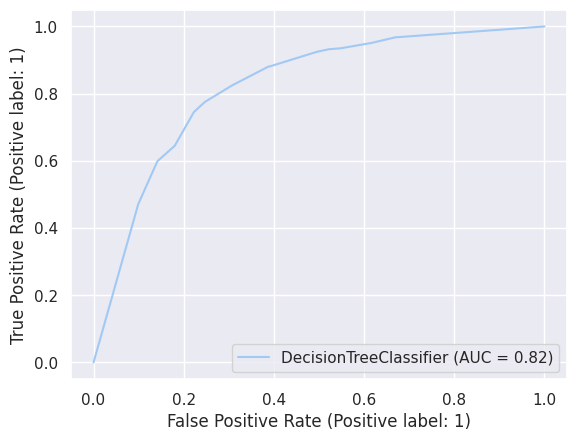

In [138]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(dtc, X_test_scaled, y_test)

# **3.Random Forest Classifier**

In [139]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier_rf.fit(X_smt, y_smt)

RandomForestClassifier(criterion='entropy', random_state=0)

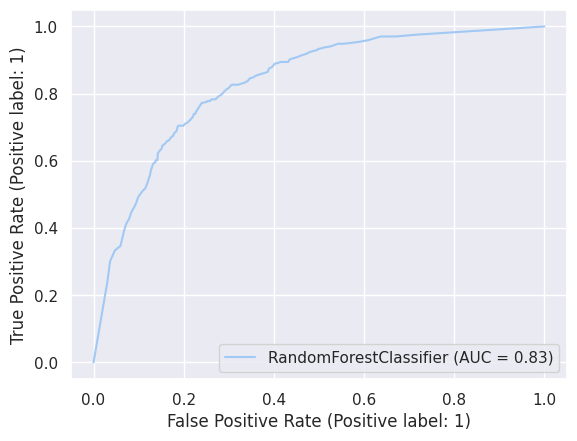

In [140]:
svc_disp = RocCurveDisplay.from_estimator(classifier_rf, X_test_scaled, y_test) 

In [141]:
y_pred = classifier_rf.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc_randomforest = accuracy_score(y_test, y_pred)
print(acc_randomforest)
print(metrics.classification_report(y_test, y_pred))

[[773 265]
 [ 82 287]]
0.7533759772565742
              precision    recall  f1-score   support

           0       0.90      0.74      0.82      1038
           1       0.52      0.78      0.62       369

    accuracy                           0.75      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.75      0.77      1407



# **4.XGBoost**

In [142]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score 
import numpy as np 
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]: 
  model = xgb.XGBClassifier(learning_rate = lr, n_estimators=100, verbosity = 0) # initialise the model model.fit(X_smt,y_smt) #train the model 
  print("Learning rate : ", lr," Cross-Val score : ", np.mean(cross_val_score(model, X_test_scaled, y_test, cv=10)))

Learning rate :  0.01  Cross-Val score :  0.7903090172239108
Learning rate :  0.02  Cross-Val score :  0.7832117527862208
Learning rate :  0.03  Cross-Val score :  0.781079027355623
Learning rate :  0.04  Cross-Val score :  0.7739716312056737
Learning rate :  0.05  Cross-Val score :  0.7746960486322187
Learning rate :  0.1  Cross-Val score :  0.7697011144883484
Learning rate :  0.11  Cross-Val score :  0.7654407294832827
Learning rate :  0.12  Cross-Val score :  0.7689817629179332
Learning rate :  0.13  Cross-Val score :  0.7696909827760892
Learning rate :  0.14  Cross-Val score :  0.7626291793313069
Learning rate :  0.15  Cross-Val score :  0.7640172239108409
Learning rate :  0.2  Cross-Val score :  0.7540628166160082
Learning rate :  0.5  Cross-Val score :  0.7434599797365754
Learning rate :  0.7  Cross-Val score :  0.7469503546099291
Learning rate :  1  Cross-Val score :  0.7405876393110435


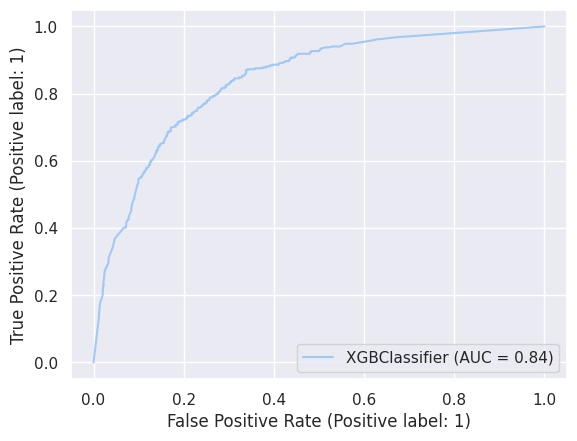

In [143]:
from sklearn.metrics import RocCurveDisplay  
model = xgb.XGBClassifier(learning_rate = 0.01, n_estimators=100, verbosity = 0) # initialise the model 
model.fit(X_smt,y_smt)
svc_disp = RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)  
     

# **5.Kneighbor's Classifier**

In [144]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import cross_val_score 
for i in [1,2,3,4,5,6,7,8,9,10,20,30,40,50]: 
  knn= KNeighborsClassifier(i)
  knn.fit(X_smt, y_smt) 
  print("K value :", i, "Cross Value Accuracy :" , np.mean(cross_val_score(knn, X_test_scaled, y_test, cv=10)))

K value : 1 Cross Value Accuracy : 0.7164133738601823
K value : 2 Cross Value Accuracy : 0.7611752786220871
K value : 3 Cross Value Accuracy : 0.7575987841945289
K value : 4 Cross Value Accuracy : 0.7583485309017224
K value : 5 Cross Value Accuracy : 0.7547619047619047
K value : 6 Cross Value Accuracy : 0.7597315096251266
K value : 7 Cross Value Accuracy : 0.7583282674772037
K value : 8 Cross Value Accuracy : 0.7689969604863223
K value : 9 Cross Value Accuracy : 0.7597416413373861
K value : 10 Cross Value Accuracy : 0.7718439716312057
K value : 20 Cross Value Accuracy : 0.7718591691995946
K value : 30 Cross Value Accuracy : 0.7732928064842958
K value : 40 Cross Value Accuracy : 0.7697467071935156
K value : 50 Cross Value Accuracy : 0.7718541033434649


In [145]:
knn= KNeighborsClassifier(5)
knn.fit(X_smt, y_smt)
print(knn.score(X_smt,y_smt)) 
print( "AUROC on the sampled dataset : ",roc_auc_score( y_test, knn.predict_proba(X_test_scaled)[:, 1]))  

0.9784143635263264
AUROC on the sampled dataset :  0.7673828135198499


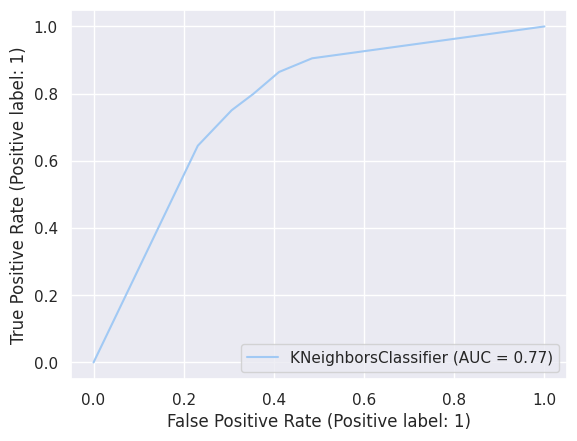

In [146]:
from sklearn.metrics import RocCurveDisplay
svc_disp = RocCurveDisplay.from_estimator(knn, X_test_scaled, y_test)

# **FEATURE IMPORTANCE FROM ALL MODELS:**

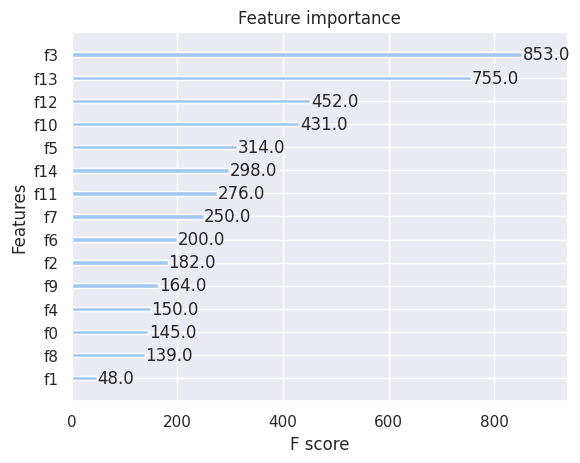

In [147]:
from xgboost import plot_importance

# plot feature importance
plot_importance(model)
plt.show()

In [148]:
dx.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [149]:
importance = dtc.feature_importances_
list(zip(importance,['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']))

[(0.0003856413734848401, 'gender'),
 (0.0, 'SeniorCitizen'),
 (0.0, 'Partner'),
 (0.04374346234771048, 'Dependents'),
 (0.0, 'tenure'),
 (0.012866423034925634, 'PhoneService'),
 (0.09785142828570043, 'MultipleLines'),
 (0.0, 'InternetService'),
 (0.0, 'OnlineSecurity'),
 (0.0, 'OnlineBackup'),
 (0.7905094016176781, 'DeviceProtection'),
 (0.0, 'TechSupport'),
 (0.0033282455888014105, 'StreamingTV'),
 (0.0409470850383628, 'StreamingMovies'),
 (0.010368312713336342, 'Contract')]

In [150]:
importance = classifier_rf.feature_importances_
list(zip(importance,['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']))

[(0.015391369741632186, 'gender'),
 (0.016847712024719446, 'SeniorCitizen'),
 (0.017051132928685996, 'Partner'),
 (0.12382293731731954, 'Dependents'),
 (0.01909775631113441, 'tenure'),
 (0.06259779117663627, 'PhoneService'),
 (0.11594696127816001, 'MultipleLines'),
 (0.03981226626340873, 'InternetService'),
 (0.01709959225964953, 'OnlineSecurity'),
 (0.07286356023537856, 'OnlineBackup'),
 (0.2351951635077915, 'DeviceProtection'),
 (0.02975836975186535, 'TechSupport'),
 (0.05453561187482458, 'StreamingTV'),
 (0.0912895958712912, 'StreamingMovies'),
 (0.0886901794575028, 'Contract')]

In [151]:
importance = model.feature_importances_
list(zip(importance,['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']))

[(0.011071726, 'gender'),
 (0.008760616, 'SeniorCitizen'),
 (0.009939938, 'Partner'),
 (0.018267635, 'Dependents'),
 (0.01663897, 'tenure'),
 (0.023784507, 'PhoneService'),
 (0.16765831, 'MultipleLines'),
 (0.019471435, 'InternetService'),
 (0.014920331, 'OnlineSecurity'),
 (0.025835505, 'OnlineBackup'),
 (0.6147287, 'DeviceProtection'),
 (0.009275204, 'TechSupport'),
 (0.011712829, 'StreamingTV'),
 (0.023449004, 'StreamingMovies'),
 (0.024485381, 'Contract')]

Models are tested to see which one can better predict quality of the question.

1.DECISION TREE,the model accuracy is 0.74

2.DECISION TREE with max depth, the model accuracy is 0.81

3.RANDOM FOREST, the model Accuracy score is 0.83

4.XG BOOST CLASSIFIER, the model Accuracy score is 0.84

5.LOGISTIC REGRESSION ,the model accuracy score is 0.81

The model XG BOOST CLASSIFIER,has the highest Accuracy score, coming in at 0.84

# **BUSINESS INTERPRETATIONS**

1.The customers who use month-month contract are tend to churn more,so we can give offers for them to extend their subscription.

2.The customers who are not senior citizen are churning more.

3.The gender,phone service doesnt play a role in predicting whether customer churn or not.